In [1]:
using Pkg; Pkg.activate("..")
using Revise
using Geom4hep

  Activating environment at `~/Development/VecGeom/Geom4hep/Project.toml`
┌ Info: Precompiling Geom4hep [eb5d0804-93e0-431a-a4d4-b4f95b95575a]
└ @ Base loading.jl:1342


In [2]:
# Defines two funstions to create geometry and generate image
include("XRay.jl")

# Contruct the geometry
world = buildGeom(Float64);

In [38]:
# Draw the geometry using Makie (GL)
using GLMakie
s = Scene()
draw(s, world)

GLMakie.Screen(...)

  1.632794 seconds (18.99 M allocations: 627.870 MiB, 7.63% gc time, 6.29% compilation time)


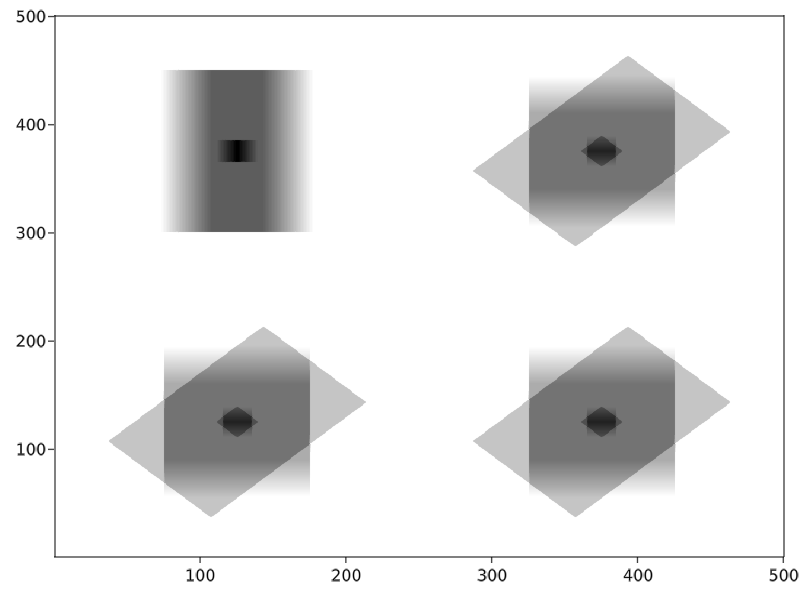

In [47]:
# produce the the X-ray and plot it
@time image = generateXRay(world, 2.5e5)
heatmap(image, colormap=:grayC)

In [33]:
@time image = generateXRay(world, 2.5e5);

  0.771598 seconds (14.23 M allocations: 497.338 MiB, 9.28% gc time)


```
- Original (2.5e5): 2.666829 seconds (32.01 M allocations: 1.160 GiB, 7.68% gc time) 132/point
- Dist2In:          1.507672 seconds (16.30 M allocations: 865.131 MiB, 12.13% gc time) 65/point
- ComposeTrans:     0.940077 seconds (13.58 M allocations: 679.396 MiB, 19.78% gc time)
- mutable structs:  0.865495 seconds (12.40 M allocations: 392.292 MiB, 14.28% gc time) 50/point
New geometry (8 daughters)
- 0.880380 seconds (14.23 M allocations: 497.338 MiB, 10.70% gc time)
```

In [27]:
16.3e6/2.5e5

65.2

In [42]:
#state = NavigatorState{Float64}(world)
d = Vector3{Float64}(1,0,0)
p = Point3{Float64}(-99,50,50)
function onepoint(lv::Volume{T}, p::Point3{T}, d::Vector3{T}) where T<:AbstractFloat
    state = NavigatorState{Float64}(lv)
    locateGlobalPoint!(state, p)
    step = -1.0
    while step != 0.0
        step = computeStep!(state, p, d, 1000.)
        p = p + step * d
    end
end


onepoint (generic function with 1 method)

In [46]:
onepoint(world,p,d)

  0.000023 seconds (6 allocations: 896 bytes)
  0.000012 seconds (4 allocations: 448 bytes)
  0.000000 seconds
  0.000000 seconds
  0.000011 seconds (4 allocations: 448 bytes)
  0.000008 seconds (4 allocations: 448 bytes)
  0.000000 seconds
  0.000000 seconds
  0.000000 seconds
  0.000000 seconds


In [54]:
for (idx, daughter) in enumerate(world.daughters)
    println(idx)
end

1
2
3
4
5
6
7
8


```
0.000016 seconds (4 allocations: 320 bytes)
  0.000033 seconds (12 allocations: 1.500 KiB)
  0.000024 seconds (8 allocations: 800 bytes)
  0.000016 seconds (4 allocations: 160 bytes)
```

In [89]:
mutable struct B
    x::Float64
    y::Float64
    z::Float64
end
s = 10.
r1 = B(.5, 0., 0.)
r2 = B(.1, 0., 0.)
v = [r1,r2]
@time rs = sizehint!([],16)
@time push!(rs, v[1])
@time push!(rs, v[2])
v[1] === rs[1]



  0.000004 seconds (2 allocations: 224 bytes)
  0.000013 seconds
  0.000019 seconds


true

In [35]:
t = one(Transformation3D{Float64})
t == one(Transformation3D{Float64})


false

In [16]:
using Pkg; Pkg.activate("..")
using StaticArrays
Vector3 = SVector{3}{Float64}

struct A
    v::Vector3
end
struct B
    va::Vector{A}
end
struct C
    b::B
end

a = A( Vector3(2,2,2) )
b = B([a,a,a,a])
c = C(b)

function loop(c::C)
  b = c.b
  m = 0
  for a in b.va
    if a.v[1] > m
        m = a.v[1] 
    end
  end
  m
end

@time loop(c)




  Activating environment at `~/Development/VecGeom/Geom4hep/Project.toml`


  0.000001 seconds


2.0

In [18]:
@time loop(c)

  0.000001 seconds


2.0

In [53]:
@benchmark push!(vb,b)

BenchmarkTools.Trial: 10000 samples with 994 evaluations.
 Range (min … max):  26.702 ns …  39.557 μs  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     29.793 ns               ┊ GC (median):    0.00%
 Time  (mean ± σ):   40.919 ns ± 457.974 ns  ┊ GC (mean ± σ):  0.00% ± 0.00%

  ▂▅▇█▇▆▅▃▂▃▂▂▁▁▁      ▂▁ ▁   ▁▁▁        ▁  ▁                  ▂
  ██████████████████▇▇████████████▇▇▇▇▇▆█████▇▆▆▆█▇▆▅▆▅▅▆▄▅▅▄▅ █
  26.7 ns       Histogram: log(frequency) by time      70.6 ns <

 Memory estimate: 0 bytes, allocs estimate: 0.

In [56]:
Vector3(0,0,0)

3-element StaticArrays.SVector{3, Int64} with indices SOneTo(3):
 0
 0
 0